In [1]:
from generator import gaussian_noise_generator
from generator import sphere_point_generator
from generator import gaussian_point_generator
from functions import noisy_function
from functions import sphere_function
from functions import quadratic
import algorithms as alg
from functions import compute_L
import numpy as np
from utilities import plot_real_values
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
import seaborn as sns
sns.set_style("whitegrid")
import time

In [2]:
def draw_contour(func, results, figsize, levels=np.arange(5, 1000, 10), x=np.arange(-5, 5.1, 0.05), y=np.arange(-5, 5.1, 0.05)):
    """ 
    Draws a contour plot of given iterations for a function
    func:       the contour levels will be drawn based on the values of func
    gd_xs:      gradient descent iterates
    newton_xs:  Newton iterates
    fig:        figure index
    levels:     levels of the contour plot
    x:          x coordinates to evaluate func and draw the plot
    y:          y coordinates to evaluate func and draw the plot
    """
    Z = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            Z[i, j] = func( np.matrix([x[i],y[j]]).T , 0 )
    
    fig,ax=plt.subplots(1,1,figsize=figsize)
    ax.contour( x, y, Z.T, levels, colors='0.75')
    
    lines=[]
    for r in results:
        xs=r[1]
        line, = ax.plot( xs[0][0,0], xs[0][1,0], linewidth=2, marker='o', label=r[3] )
        lines.append(line)
    
    L = plt.legend(handles=lines)
#     plt.draw()
#     time.sleep(1)
    
    for i in range( 1, max(len(gd_xs), len(newton_xs)) ):
        for j in range(len(results)):
            xs=results[j][1]
            line[j].set_xdata( np.append( line[j].get_xdata(), xs[ min(i,len(xs)-1) ][0,0] ) )
            L.get_texts()[j].set_text( " %s, %d iterations" % (results[j][3],min(i,len(xs)-1) ))
        
#         plt.draw()
#         input("Press Enter to continue...")
    plt.xlim((int(x.min()),int(x.max())))
    plt.ylim((int(y.min()),int(y.max())))
    plt.show()

In [10]:
sigma = 1e-3
noise_G = gaussian_noise_generator(sigma)
#func = lambda x, order=0: sphere_function(x, 2, order)
H = np.matrix('10 0; 0 40');
# the vector of linear coefficient of the quadratic function
b = np.matrix('0; 0')
func = lambda x, order=0: quadratic( H, b, x, order )
noisy_func = lambda x, n: noisy_function(func, x, noise_G, n, noise_mode="multiply")
initial_x = np.matrix('100;100')
N = 1000
m = 100
t = 1e-4
n = initial_x.shape[0]
L = compute_L(func, n)
direction_G1 = sphere_point_generator(n)
direction_G2 = gaussian_point_generator(n)

In [11]:
results=[]
results.append(alg.ardfds(noisy_func, initial_x, L, m, t, N, direction_generator = direction_G1))
results.append(alg.rsgf(noisy_func, initial_x, L, m, t, N, direction_generator = direction_G1, two_phase = True))
results.append(alg.rg(noisy_func, initial_x, L, m, t, N, direction_generator = direction_G2))

In [12]:
def get_real_values(real_func, xs):
    values = np.array(list(map(lambda x: real_func(x)[0,0], xs)))
    return values

In [13]:
sns.set_context("notebook", font_scale=2)

In [16]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
for i in range(len(results)):
    xs=results[i][1]
    ys=get_real_values(func, xs)
    print(len(results))
    ax.plot(ys,label=results[i][3])
ax.set_yscale("log", nonposy='clip')
plt.legend()
plt.show()

3


IndexError: tuple index out of range

In [26]:
sns.set_context("notebook", font_scale=2)

In [27]:
sns.set_style("white")

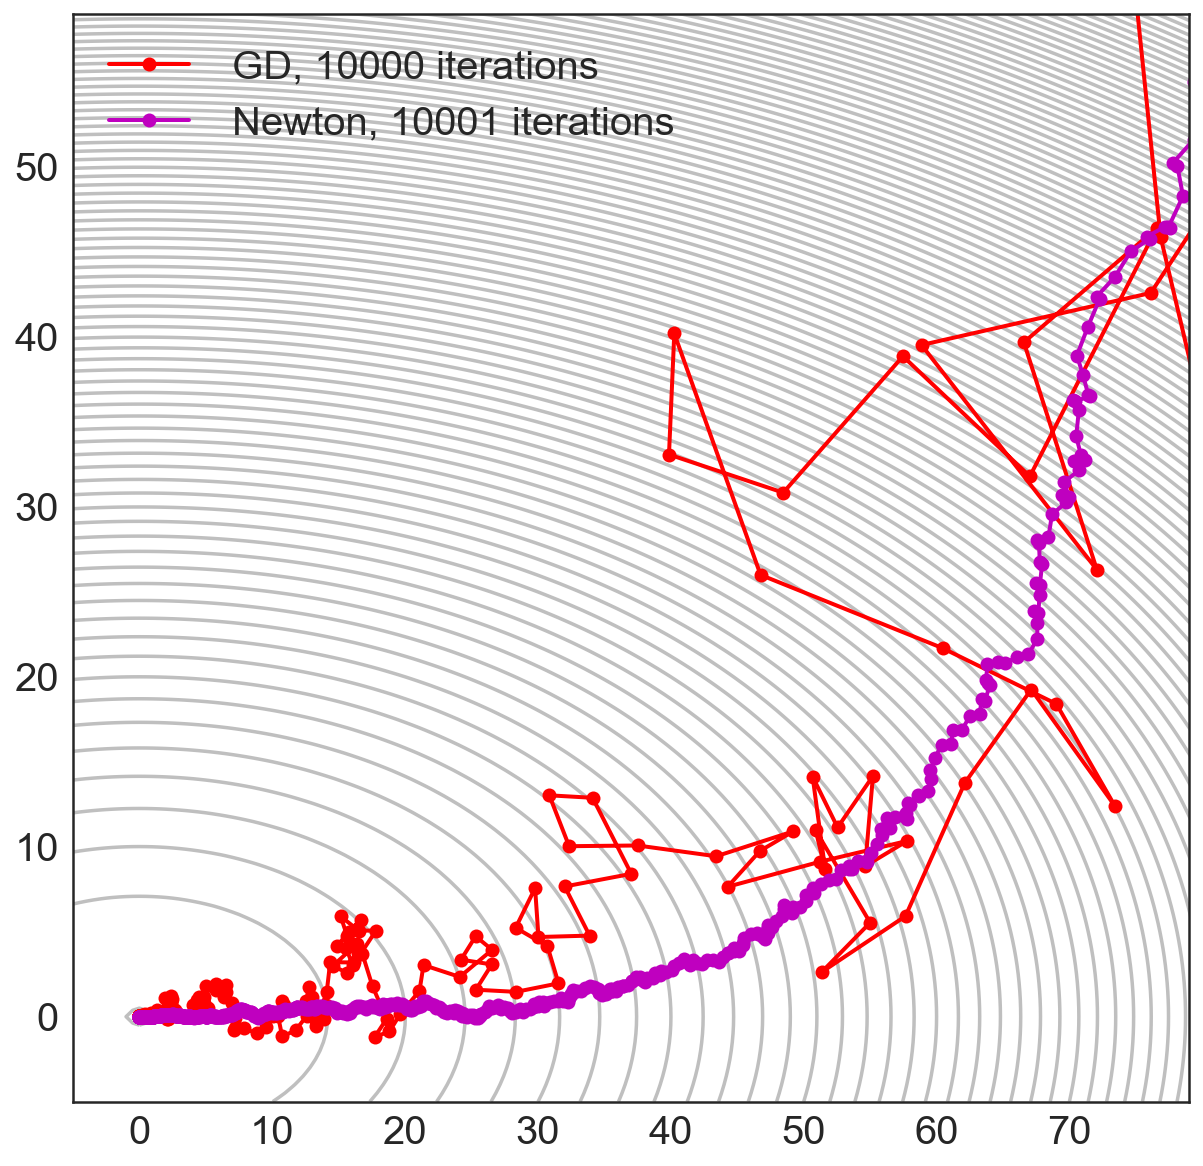

In [30]:
draw_contour(
    func,
    xs0,
    xs1,
    figsize=(10, 10),
    levels=np.arange(5, 200000, 1000),
    x=np.arange(-5, 80, 0.5),
    y=np.arange(-5, 60, 0.5)
)